<a href="https://colab.research.google.com/github/ApssaraGanesh/AIML_CODEBASE/blob/TASK3/TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install evaluate sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 15.4 MB/s eta 0:00:00


In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=10a7286f47368c17b58514431df230106ded36417873ad2357f3637c651cad2f
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
!pip install transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.6 MB/s eta 0:00:00


In [ ]:
!pip install wandb

In [1]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=24137dad5cabd74d18f0626155d7b93974165c4d698d2976d72716adaafaa0f4
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
import wandb
wandb.init(project='task3')

In [ ]:
import os
import json
import math
import random
import torch
import evaluate
import numpy as np
import pandas as pd
import  seaborn as sns
from matplotlib import pyplot as plt


from transformers import LineByLineTextDataset
from transformers import DataCollatorForLanguageModeling
from transformers import GPT2Tokenizer,GPT2LMHeadModel
from transformers import Trainer,TrainingArguments

In [ ]:
DOWN_DATA_PATH = '/content/drive/MyDrive/Dataset3'
LINES_DATA_PATH = 'task3_dataset'
#MODEL_KEY = 'gpt2-medium'
MODEL_KEY = 'olm/olm-gpt2-dec-2022'
EXP_NAME = f'qa-subgen-{MODEL_KEY}'


SEED_VALUE = 15
LEARNING_RATE = 1e-4
TRAIN_BATCH_SIZE =2
EVAL_BATCH_SIZE = 2 * TRAIN_BATCH_SIZE
N_EPOCHS = 16

In [ ]:
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
torch.manual_seed(SEED_VALUE)

In [ ]:
"""
jsonl_file_path = '/content/drive/MyDrive/task3dataset/dev.jsonl'  # Replace with your JSONL file path


with open(jsonl_file_path, 'r') as jsonl_file:
    for line in jsonl_file:
        #print(line.strip())
"""


"\njsonl_file_path = '/content/drive/MyDrive/task3dataset/dev.jsonl'  # Replace with your JSONL file path\n\n\nwith open(jsonl_file_path, 'r') as jsonl_file:\n    for line in jsonl_file:\n        #print(line.strip())\n"

In [ ]:
jsonl_file_path = '/content/drive/MyDrive/Dataset3/train.jsonl'  # Replace with your JSONL file path
output_text_file_path = '/content/task3_dataset/train.txt'

In [ ]:
import json
import os

def prepare_train_dataset(jsonl_file_path, output_text_file_path):
    with open(jsonl_file_path, 'r') as jsonl_file:
        with open(output_text_file_path, 'w') as text_file:
            for line in jsonl_file:
                #print(line)
                data = json.loads(line)
                prompt = data.get('prompt', '')
                response = data.get('response', '')

                formatted_text = f"prompt: {prompt} response: {response}\n"
                text_file.write(formatted_text)

# Example usage:
jsonl_file_path = '/content/drive/MyDrive/Dataset3/train.jsonl'  # Replace with your JSONL file path
output_text_file_path = '/content/drive/MyDrive/Dataset3/train.txt'  # Replace with your desired output file path

prepare_train_dataset(jsonl_file_path, output_text_file_path)


In [ ]:
import json
import os

def prepare_test_dataset(jsonl_file_path, output_text_file_path):
    with open(jsonl_file_path, 'r') as jsonl_file:
        with open(output_text_file_path, 'w') as text_file:
            for line in jsonl_file:
                #print(line)
                data = json.loads(line)
                prompt = data.get('prompt', '')
                response = data.get('response', '')

                formatted_text = f"prompt: {prompt} response: {response}\n"
                text_file.write(formatted_text)

# Example usage:
jsonl_file_path = '/content/drive/MyDrive/Dataset3/test.jsonl'  # Replace with your JSONL file path
output_text_file_path = '/content/drive/MyDrive/Dataset3/test.txt'  # Replace with your desired output file path

prepare_test_dataset(jsonl_file_path, output_text_file_path)


In [ ]:
import json
import os

def prepare_dev_dataset(jsonl_file_path, output_text_file_path):
    with open(jsonl_file_path, 'r') as jsonl_file:
        with open(output_text_file_path, 'w') as text_file:
            for line in jsonl_file:
                #print(line)
                data = json.loads(line)
                prompt = data.get('prompt', '')
                response = data.get('response', '')

                formatted_text = f"prompt: {prompt} response: {response}\n"
                text_file.write(formatted_text)

# Example usage:
jsonl_file_path = '/content/drive/MyDrive/Dataset3/dev.jsonl'  # Replace with your JSONL file path
output_text_file_path = '/content/drive/MyDrive/Dataset3/dev.txt'  # Replace with your desired output file path

prepare_dev_dataset(jsonl_file_path, output_text_file_path)


In [ ]:
len(train_dataset),len(dev_dataset),len(test_dataset)

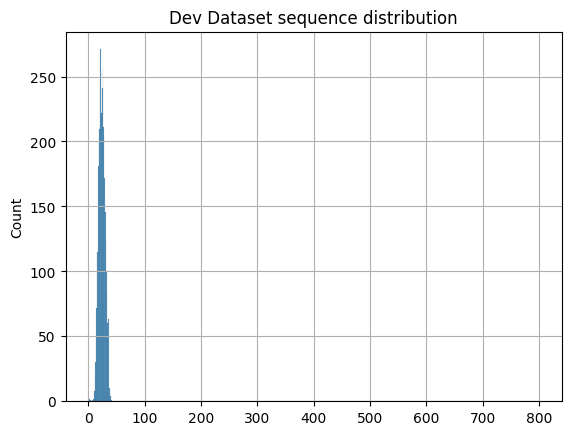

In [ ]:
with open('/content/drive/MyDrive/Dataset3/dev.txt','r') as f:
    dev_lines = f.readlines()
dev_seq_lens = np.array([len(line.split()) for line in dev_lines])
sns.histplot(dev_seq_lens,binrange=(0,800))
plt.grid()
plt.title('Dev Dataset sequence distribution')
plt.show()

In [ ]:
sns.ecdfplot(np.clip(dev_seq_lens,a_min=0,a_max=800))
plt.grid()
plt.title('ECDF plot for dev sequence distribution')
plt.show()

In [ ]:
dev_seq_lens.mean(),dev_seq_lens.std(),np.median(dev_seq_lens),dev_seq_lens.min(),dev_seq_lens.max()

(24.12882619110993, 5.576091786099025, 24.0, 0, 42)

In [ ]:
def load_dataset(file_path,tokenizer):
    block_size = 256 if 'train' in file_path else 512

    dataset = LineByLineTextDataset(
             tokenizer=tokenizer,
             file_path=file_path,
             block_size=block_size
    )
    return dataset

In [ ]:
def load_data_collator(tokenizer,mlm=False):
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=mlm
    )
    return data_collator

In [ ]:
from transformers import AutoTokenizer, RobertaModel
import torch


tokenizer= GPT2Tokenizer.from_pretrained(MODEL_KEY)
tokenizer.add_special_tokens({'pad_token':'{PAD}'})

model = GPT2LMHeadModel.from_pretrained(MODEL_KEY)
model.resize_token_embeddings(len(tokenizer))

type(tokenizer),type(model)

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 50266. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


(transformers.models.gpt2.tokenization_gpt2.GPT2Tokenizer,
 transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel)

In [ ]:
n_model_params = 0
for p in model.parameters():
    n_model_params += p.numel()

print(f' *parameters in LM Head Model {MODEL_KEY}:{n_model_params}')

 *parameters in LM Head Model olm/olm-gpt2-dec-2022:124446720


In [ ]:
train_dataset=load_dataset('/content/drive/MyDrive/Dataset3/train.txt',tokenizer)
dev_dataset=load_dataset('/content/drive/MyDrive/Dataset3/dev.txt',tokenizer)
test_dataset=load_dataset('/content/drive/MyDrive/Dataset3/test.txt',tokenizer)


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:119: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
len(train_dataset),len(dev_dataset),len(test_dataset)

(26291, 3754, 7511)

In [ ]:
data_collator=load_data_collator(tokenizer)


In [ ]:
from evaluate import load

In [ ]:
bleu = evaluate.load('bleu')
rouge = evaluate.load('rouge')
bertscore = load('bertscore')
#meteor = evaluate.load('meteor')


def preprocess_logits_for_metrics(logits, labels):
    pred_ids = torch.argmax(logits, dim=-1)

    return pred_ids, labels


def compute_metrics(eval_preds):
    logits, labels = eval_preds
    preds = logits[0]
    #print("preds:", preds)
    #print("labels:", labels)
    #print("Data type of preds:", type(preds))
    #print("Data type of labels:", type(labels))
    #print("Content of preds:",preds)

    preds = np.where(preds!= -100,preds, tokenizer.pad_token_id)
    #print("preds np:",preds)
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    #print("decoded_preds:",decoded_preds)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    #print("labels np:",labels)
    sequences = tokenizer.batch_decode(labels, skip_special_tokens=True)
    #print(sequences)

    prompts = list()
    references = list()
    for sequence in sequences:
      #print("Sequence:", sequence)
      try:
            prompt, ref_text = sequence.split('response:')
            prompt += 'response:'
            prompts.append(prompt.strip())
            references.append(ref_text.strip())
      except ValueError:
              continue
    #print("Before printing total number of prompts")
    tokenizer.padding_side='left'
    n_batches = math.ceil(len(prompts)*1.0 / EVAL_BATCH_SIZE)
    outputs = list()
    #print("Total number of prompts:", len(prompts))
    for i in range(n_batches):
        prompts_batch = prompts[i*EVAL_BATCH_SIZE : (i+1)*EVAL_BATCH_SIZE]
        prompts_batch_ids = tokenizer(prompts_batch,
            padding=True, truncation=True, return_tensors='pt').to(model.device)
        output_ids = model.generate(
            **prompts_batch_ids, max_new_tokens=10,
            pad_token_id=tokenizer.pad_token_id)
        outputs_batch = [seq.split('response:')[1] for seq in
            tokenizer.batch_decode(output_ids, skip_special_tokens=True)]
        outputs.extend(outputs_batch)
    tokenizer.padding_side='right'

    bleu_score = bleu.compute(predictions=outputs, references=references)
    rouge_score = rouge.compute(predictions=outputs, references=references)
    #bleurt = load("bleurt", module_type="metric")
    results = bertscore.compute(predictions=outputs, references=references,lang='en')
    avg_precision = sum(results['precision']) / len(results['precision'])
    avg_recall = sum(results['recall']) / len(results['recall'])
    avg_f1 = sum(results['f1']) / len(results['f1'])
    #results = bertscore.compute(predictions=outputs, references=references, model_type="distilgpt2")
    #f1_score = lambda predictions, references: (2 * sum((collections.Counter(predictions) & collections.Counter(references)).values()) / (len(predictions) + len(references))) if (num_same := sum((collections.Counter(predictions) & collections.Counter(references)).values())) != 0 else 0
    #average_f1 = sum(f1_score) / len(f1_score)
    #meteor_score = meteor.compute(predictions=outputs, references=references)
    wandb.log(
        {
        'BLEU': round(bleu_score['bleu'], 4) * 100,
        'R1': round(rouge_score['rouge1'], 4) * 100,
        'R2': round(rouge_score['rouge2'], 4) * 100,
        'RL': round(rouge_score['rougeL'], 4) * 100,
        'RLsum': round(rouge_score['rougeLsum'], 4) * 100,
        'PRECISION': round(avg_precision,2) * 100,
        'RECALL': round(avg_recall,2) * 100,
        'F1_SCORE' : round(avg_f1,2) * 100,
        #'METEOR': round(meteor_score['meteor'], 4) * 100
        }
    )

    return {
        'BLEU': round(bleu_score['bleu'], 4) * 100,
        'R1': round(rouge_score['rouge1'], 4) * 100,
        'R2': round(rouge_score['rouge2'], 4) * 100,
        'RL': round(rouge_score['rougeL'], 4) * 100,
        'RLsum': round(rouge_score['rougeLsum'], 4) * 100,
        'PRECISION': round(avg_precision,2) * 100,
        'RECALL': round(avg_recall,2) * 100,
        'F1_SCORE' : round(avg_f1,2) * 100,
        #'METEOR': round(meteor_score['meteor'], 4) * 100
        }


In [ ]:
compute_metrics

<function __main__.compute_metrics(eval_preds)>

In [ ]:
training_args = TrainingArguments(
          output_dir=EXP_NAME,
          overwrite_output_dir=True,
          evaluation_strategy = 'steps',
          eval_steps = 500,
          max_steps = 5000,
          learning_rate=LEARNING_RATE,
          save_strategy = 'epoch',
          per_device_train_batch_size=TRAIN_BATCH_SIZE,
          per_device_eval_batch_size=EVAL_BATCH_SIZE,
          num_train_epochs=N_EPOCHS
      )

trainer = Trainer(
          model=model,
          args=training_args,
          data_collator=data_collator,
          train_dataset=train_dataset,
          eval_dataset=dev_dataset,
          preprocess_logits_for_metrics=preprocess_logits_for_metrics,
          compute_metrics=compute_metrics
  )
trainer.train()
trainer.save_model()


Step,Training Loss,Validation Loss,Bleu,R1,R2,Rl,Rlsum,Precision,Recall,F1 Score
500,2.832900,2.773561,7.020000,30.920000,10.680000,29.270000,29.290000,89.000000,88.000000,88.000000
1000,2.795900,2.673188,2.810000,19.200000,4.390000,17.700000,17.700000,87.000000,86.000000,87.000000
1500,2.674600,2.629271,5.580000,25.810000,8.630000,24.410000,24.420000,87.000000,86.000000,87.000000
2000,2.601700,2.585549,10.690000,35.030000,15.580000,33.210000,33.250000,89.000000,88.000000,89.000000
2500,2.554800,2.523831,10.580000,34.790000,15.400000,32.940000,32.980000,89.000000,88.000000,89.000000
3000,2.507600,2.481173,10.640000,34.710000,15.210000,32.760000,32.780000,89.000000,88.000000,89.000000
3500,2.475600,2.418702,11.380000,36.170000,16.370000,34.160000,34.170000,89.000000,89.000000,89.000000
4000,2.460600,2.372101,10.910000,35.440000,15.930000,33.560000,33.580000,89.000000,88.000000,89.000000
4500,2.394200,2.332851,11.090000,35.860000,16.090000,34.050000,34.080000,89.000000,89.000000,89.000000
5000,2.302000,2.312357,12.190000,37.120000,17.470000,35.280000,35.300000,89.000000,89.000000,89.000000


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
